In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad
import time
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def integra_mc_sin_numpy(fun, a, b, num_puntos=10000):

    # 1- Calcular el valor maximo de la función en el intervalo [a, b]
    y_max = max(fun(x) for x in [i / 100 for i in range(int(a * 100), int(b * 100) + 1)])
    

    # 2- Generar puntos aleatorios
    x = [random.uniform(a, b) for _ in range(num_puntos)]
    y = [random.uniform(0, y_max) for _ in range(num_puntos)]

    # 3- Contar puntos debajo de la función
    puntos_debajo = sum(
        1 for x_i, y_i in zip(x, y) if y_i <= fun(x_i)
    )
  

    # 4- Calcular la integral aproximada
    area_rectangulo = (b - a) * y_max
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo

    # Mostrar resultados
   # print(f"Integral Monte Carlo: {integral_aproximada:.4f}")
'''
    # 5- Gráfica
    figura, eje = plt.subplots()
    eje.set_xlabel("X")
    eje.set_ylabel("Y")
    eje.set_xlim(a, b)
    eje.set_ylim(0, y_max * 1.1)

    # Dibujar los puntos
    eje.scatter(x, y, marker='x', color='red', alpha=0.5)

    # Dibujar la función
    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]
    y_vals = [fun(x) for x in x_vals]

    eje.plot(x_vals, y_vals, color='blue', label=f"y = {fun}")
    plt.show()

    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")
'''

'\n    # 5- Gráfica\n    figura, eje = plt.subplots()\n    eje.set_xlabel("X")\n    eje.set_ylabel("Y")\n    eje.set_xlim(a, b)\n    eje.set_ylim(0, y_max * 1.1)\n\n    # Dibujar los puntos\n    eje.scatter(x, y, marker=\'x\', color=\'red\', alpha=0.5)\n\n    # Dibujar la función\n    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]\n    y_vals = [fun(x) for x in x_vals]\n\n    eje.plot(x_vals, y_vals, color=\'blue\', label=f"y = {fun}")\n    plt.show()\n\n    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")\n'

In [13]:
'''  def integra_mc_con_numpy(fun, a, b, num_puntos=10000):

    #Defino las x
    x = [random.uniform(a, b) for _ in range(num_puntos)]

    #Vectorizas la funcion
    funVect = np.vectorize(fun)

    #Para cada valor de x buscas su "y" y almacenas el valor máximo
    max1 = max(funVect(x))

    #Defino y aleatorias para dibujar las cruces
    y = [random.uniform(0, max1) for _ in range(num_puntos)]
    
    #Numero cruces por debajo, comparo cada punto con el valor de la funcion en ese "x"
    puntos_debajo = np.sum(y <= funVect(x))
    
    #Calculo el área 
    area_rectangulo = (b - a) * max1
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo


     
     # Mostrar resultados
    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")
    
    # Grafica
    figura, eje = plt.subplots()
    eje.set_xlabel("X")
    eje.set_ylabel("Y")
    eje.set_xlim(a, b)
    eje.set_ylim(0, max1 * 1.1)

    # Dibujar los puntos
    eje.scatter(x, y, marker='x', color='red', alpha=0.5)

    # Dibujar la función
    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]
    y_vals = [fun(x) for x in x_vals]
    eje.plot(x_vals, y_vals, color='blue', label=f"y = {fun}")

    # Mostrar la gráfica
    plt.show()'''

'  def integra_mc_con_numpy(fun, a, b, num_puntos=10000):\n\n    #Defino las x\n    x = [random.uniform(a, b) for _ in range(num_puntos)]\n\n    #Vectorizas la funcion\n    funVect = np.vectorize(fun)\n\n    #Para cada valor de x buscas su "y" y almacenas el valor máximo\n    max1 = max(funVect(x))\n\n    #Defino y aleatorias para dibujar las cruces\n    y = [random.uniform(0, max1) for _ in range(num_puntos)]\n    \n    #Numero cruces por debajo, comparo cada punto con el valor de la funcion en ese "x"\n    puntos_debajo = np.sum(y <= funVect(x))\n    \n    #Calculo el área \n    area_rectangulo = (b - a) * max1\n    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo\n\n\n     \n     # Mostrar resultados\n    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")\n    \n    # Grafica\n    figura, eje = plt.subplots()\n    eje.set_xlabel("X")\n    eje.set_ylabel("Y")\n    eje.set_xlim(a, b)\n    eje.set_ylim(0, max1 * 1.1)\n\n    # Dibujar los puntos\n    eje.scatt

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def integra_mc_con_numpy(fun, a, b, num_puntos=10000):
    
    #Defino las x
    x = np.random.uniform(a, b, num_puntos)
    #ARRAYS de numpy + eficientes que listas
    
    #Para cada valor de x buscas su "y"  
    y_fun = fun(x)
    
    # Encontrar el máximo de la función en los puntos x
    max1 = np.max(y_fun)
    
    #Defino y aleatorias para dibujar las cruces
    y = np.random.uniform(0, max1, num_puntos)
    
    # Contar cuántos puntos están por debajo de la función
    puntos_debajo = np.sum(y <= y_fun)
    
    # Calcular el área del rectángulo
    area_rectangulo = (b - a) * max1
    
    # Calcular la integral aproximada
    integral_aproximada = (puntos_debajo / num_puntos) * area_rectangulo
    
    '''   
    # Mostrar resultados
    print(f"Integral Monte Carlo: {integral_aproximada:.4f}")
    
    # Grafica
    figura, eje = plt.subplots()
    eje.set_xlabel("X")
    eje.set_ylabel("Y")
    eje.set_xlim(a, b)
    eje.set_ylim(0, max1 * 1.1)

    # Dibujar los puntos
    eje.scatter(x, y, marker='x', color='red', alpha=0.5)

    # Dibujar la función
    x_vals = [i / 100 for i in range(int(a * 100), int(b * 100) + 1)]
    y_vals = [fun(x) for x in x_vals]
    eje.plot(x_vals, y_vals, color='blue', label=f"y = {fun}")

    # Mostrar la gráfica
    plt.show()'''

In [9]:
def compara_tiempos_dot(fun1,fun2,a,b,computeFunction):
    sizes = np.linspace(100, 10000000, 20,dtype=int)
    times_dot = []
    times_fast_dot = []
    
    for size in sizes:
        tic = time.process_time()
        dot = integra_mc_sin_numpy(computeFunction, a,b,size)
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]

        tic = time.process_time()
        fast_dot = integra_mc_con_numpy(computeFunction, a,b,size)
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
        
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('comparatiemposdot.png')

Integral Monte Carlo: 315.7861
Integral Monte Carlo: 343.4483
Integral Monte Carlo: 343.4870
Integral Monte Carlo: 343.2567
Integral Monte Carlo: 343.2405
Integral Monte Carlo: 343.1967
Integral Monte Carlo: 343.0616
Integral Monte Carlo: 342.8235
Integral Monte Carlo: 343.1072
Integral Monte Carlo: 342.8482
Integral Monte Carlo: 343.1494
Integral Monte Carlo: 343.4916
Integral Monte Carlo: 343.3081
Integral Monte Carlo: 343.3068
Integral Monte Carlo: 343.3279
Integral Monte Carlo: 343.2212
Integral Monte Carlo: 342.9949
Integral Monte Carlo: 343.2739
Integral Monte Carlo: 343.3860
Integral Monte Carlo: 343.2349


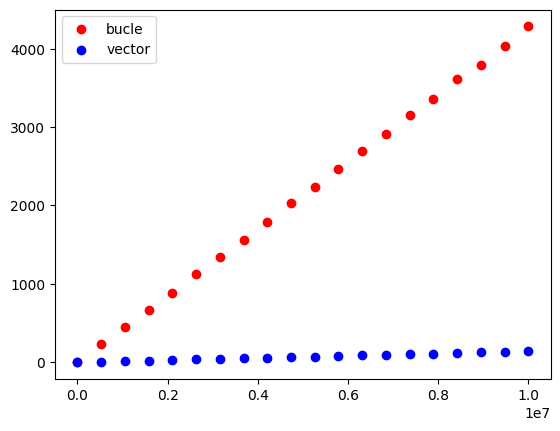

In [10]:
expr1 = (lambda x: x** 2+1) # funcion a integrar

a, b = 0, 10  # limites del intervalo
num_puntos = 10000  # puntos aleatorios

compara_tiempos_dot(integra_mc_sin_numpy,integra_mc_con_numpy,a,b,expr1)